## **Rice - Classifier Model**

- A total of 3810 rice grain's images were taken for the two species (Cammeo and Osmancik), processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.

![](https://production-media.paperswithcode.com/datasets/34f23a2e-9281-475f-bf4a-10cc4c1fd9e8.jpg)


1. Area: Returns the number of pixels within the boundaries of the rice grain. 
2. Perimeter: Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain. 
3. Major Axis Length: The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives. 
4. Minor Axis Length: The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives. 
5. Eccentricity: It measures how round the ellipse, which has the same moments as the rice grain, is. 
6. Convex Area: Returns the pixel count of the smallest convex shell of the region formed by the rice grain. 
7. Extent: Returns the ratio of the region formed by the rice grain to the bounding box pixels 
8. Class: Commeo and Osmancik.

(https://paperswithcode.com/dataset/rice-dataset-commeo-and-osmancik)

-------------------
 - imputation
 - dimensionality reduction
 - normalization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df  = pd.read_excel("datasets/Rice_Cammeo_Osmancik_deleted.xlsx", sheet_name='Rice')


In [2]:
df.head(3)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Class'] = le.fit_transform(df['Class'])

In [4]:
df.head(3)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,0
1,14656,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,0
2,14634,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3803 non-null   float64
 3   Minor_Axis_Length  3802 non-null   float64
 4   Eccentricity       3803 non-null   float64
 5   Convex_Area        3805 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   int32  
dtypes: float64(6), int32(1), int64(1)
memory usage: 223.4 KB


In [6]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,3810.000000,3810.000000,3803.000000,3802.000000,3803.000000,3805.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.740206,86.310321,0.886842,12951.068068,0.661934,0.572178
std,1732.367706,35.597081,17.441255,5.730742,0.020823,1776.961001,0.077239,0.494828
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413,0.000000
25%,11370.500000,426.144753,174.341553,82.729239,0.872344,11624.000000,0.598862,0.000000
50%,12421.500000,448.852493,185.754745,86.430691,0.888978,12705.000000,0.645361,1.000000
75%,13950.000000,483.683746,203.509949,90.135277,0.902566,14284.000000,0.726562,1.000000
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050,1.000000


In [7]:
df['Class'].value_counts()

1    2180
0    1630
Name: Class, dtype: int64

In [8]:
df.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    7
Minor_Axis_Length    8
Eccentricity         7
Convex_Area          5
Extent               0
Class                0
dtype: int64

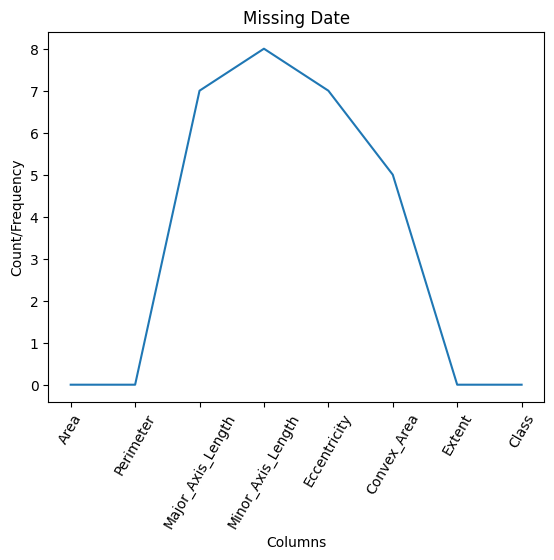

In [9]:
df.isna().sum().plot()
plt.xticks(rotation=60)
plt.title('Missing Date')
plt.xlabel('Columns')
plt.ylabel('Count/Frequency')
plt.show()

In [10]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

In [11]:
x_features = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length','Eccentricity', 'Convex_Area', 'Extent']
x_features

['Area',
 'Perimeter',
 'Major_Axis_Length',
 'Minor_Axis_Length',
 'Eccentricity',
 'Convex_Area',
 'Extent']

In [12]:
df[x_features].head(3)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259


**imputation - filling in missing data**

In [13]:
from sklearn.impute import KNNImputer #using K-Nearest Neighbor to fill in the missing rows

missingImputer = KNNImputer(n_neighbors=4)

In [14]:
df[x_features] = missingImputer.fit_transform(df[x_features])

df.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

dimensionality reduction - solution to the curse of dimensionality

    curse of dimensionality - the more features (x-columns/predictors), the less the performance of your model learning




In [15]:
from sklearn.decomposition import PCA

dimensionReduce = PCA(n_components=5)

In [16]:
new_x = dimensionReduce.fit_transform(df[x_features])

In [17]:
pd.DataFrame(new_x).head()

,0,1,2,3,4
0,3698.053550,25.639091,26.770735,-0.579808,0.148446
1,2905.947943,55.833656,-3.085279,-1.152407,-0.215369
2,2806.249156,-10.282175,11.860180,-0.170439,-0.170277
3,652.367868,-74.008248,-0.550894,-1.432742,0.345677
4,3064.524290,165.955969,4.278817,-1.065044,-0.724837


normalization

In [18]:
#normalize the predictors (x)
df[x_features].head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024


In [19]:
from sklearn.preprocessing import Normalizer

normalize_X_features = Normalizer()

normalized_X = normalize_X_features.fit_transform(df[x_features])
normalized_X

array([[6.97957569e-01, 2.40845530e-02, 1.05282428e-02, ...,
        4.25658344e-05, 7.15645942e-01, 2.62528244e-05],
       [6.96910892e-01, 2.35050985e-02, 9.79650843e-03, ...,
        4.25776128e-05, 7.16692206e-01, 2.92647565e-05],
       [6.99175127e-01, 2.39423291e-02, 1.02294749e-02, ...,
        4.35786711e-05, 7.14463909e-01, 3.31221351e-05],
       ...,
       [7.00954731e-01, 2.49394358e-02, 1.03462497e-02, ...,
        4.96616787e-05, 7.12677702e-01, 3.53232573e-05],
       [6.99131230e-01, 2.77542079e-02, 1.14041438e-02, ...,
        6.18624380e-05, 7.14342039e-01, 4.66274005e-05],
       [7.02006807e-01, 2.48477496e-02, 9.88969246e-03, ...,
        5.06945538e-05, 7.11646047e-01, 4.92982302e-05]])

In [20]:
new_x.shape

(3810, 5)

In [21]:
from sklearn.model_selection import train_test_split


#reduced columns with PCA
X_train, X_test, Y_train, Y_test = train_test_split(new_x,df['Class'], test_size=0.30, shuffle=True, random_state=100)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(2667, 5) (2667,)
(1143, 5) (1143,)


In [22]:
#original columns
X_train_ORIG, X_test_ORIG, Y_train_ORIG, Y_test_ORIG = train_test_split(df[x_features],df['Class'], test_size=0.30, shuffle=True, random_state=100)

print(X_train_ORIG.shape, Y_train_ORIG.shape)
print(X_test_ORIG.shape, Y_test_ORIG.shape)

(2667, 7) (2667,)
(1143, 7) (1143,)


In [23]:
#normalized columns
X_train_NORM, X_test_NORM, Y_train_NORM, Y_test_NORM = train_test_split(normalized_X, df['Class'], test_size=0.30, shuffle=True, random_state=100)

print(X_train_NORM.shape, Y_train_NORM.shape)
print(X_test_NORM.shape, Y_test_NORM.shape)

(2667, 7) (2667,)
(1143, 7) (1143,)


model training and evaluation

In [24]:
from xgboost import XGBClassifier

pca_model = XGBClassifier()
orig_model = XGBClassifier()


In [25]:
pca_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [26]:
orig_model.fit(X_train_ORIG, Y_train_ORIG)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [27]:
normalized_model = XGBClassifier()
normalized_model.fit(X_train_NORM, Y_train_NORM)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, classification_report

print("PCA MODEL-------------")
accuracy_score(Y_test,pca_model.predict(X_test))

PCA MODEL-------------


0.9256342957130359

In [29]:
print(classification_report(Y_test,pca_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       504
           1       0.93      0.93      0.93       639

    accuracy                           0.93      1143
   macro avg       0.92      0.92      0.92      1143
weighted avg       0.93      0.93      0.93      1143



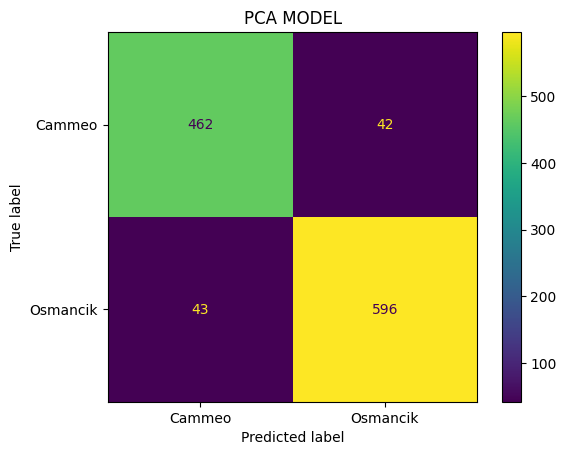

In [30]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, pca_model.predict(X_test)), display_labels = le.classes_).plot()
plt.title('PCA MODEL')
plt.show()

In [31]:
print("ORIGINAL DATA MODEL-------------")
print(accuracy_score(Y_test_ORIG,orig_model.predict(X_test_ORIG)))

print(classification_report(Y_test_ORIG,orig_model.predict(X_test_ORIG)))

ORIGINAL DATA MODEL-------------
0.9168853893263342
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       504
           1       0.92      0.93      0.93       639

    accuracy                           0.92      1143
   macro avg       0.92      0.91      0.92      1143
weighted avg       0.92      0.92      0.92      1143



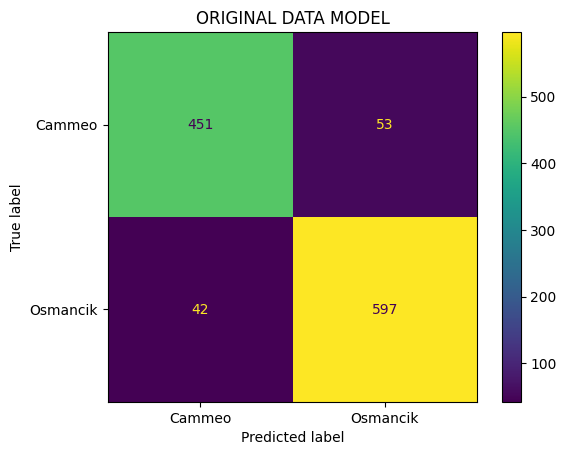

In [32]:
ConfusionMatrixDisplay(confusion_matrix(Y_test_ORIG,orig_model.predict(X_test_ORIG)), display_labels = le.classes_).plot()
plt.title('ORIGINAL DATA MODEL')
plt.show()

In [33]:
print("NORMALIZED DATA MODEL-------------")
print(accuracy_score(Y_test_NORM,normalized_model.predict(X_test_NORM)))

print(classification_report(Y_test_NORM,normalized_model.predict(X_test_NORM)))

NORMALIZED DATA MODEL-------------
0.9256342957130359
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       504
           1       0.93      0.94      0.93       639

    accuracy                           0.93      1143
   macro avg       0.93      0.92      0.92      1143
weighted avg       0.93      0.93      0.93      1143



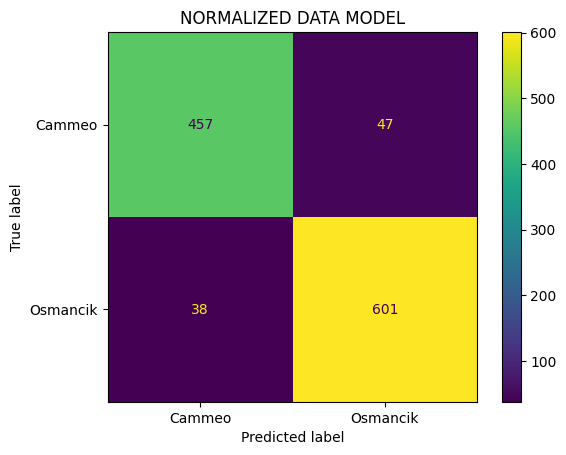

In [34]:
ConfusionMatrixDisplay(confusion_matrix(Y_test_NORM,normalized_model.predict(X_test_NORM)), display_labels = le.classes_).plot()
plt.title('NORMALIZED DATA MODEL')
plt.show()

normalized + PCA

In [38]:
normalized_X[:2]

array([[6.97957569e-01, 2.40845530e-02, 1.05282428e-02, 3.89940605e-03,
        4.25658344e-05, 7.15645942e-01, 2.62528244e-05],
       [6.96910892e-01, 2.35050985e-02, 9.79650843e-03, 4.36192097e-03,
        4.25776128e-05, 7.16692206e-01, 2.92647565e-05]])

In [49]:
norm_PCA = PCA(n_components=3)
norm_PCA_X = norm_PCA.fit_transform(normalized_X)

In [50]:
#normalized columns
X_train_NORM_PCA, X_test_NORM_PCA, Y_train_NORM_PCA, Y_test_NORM_PCA = train_test_split(norm_PCA_X, df['Class'], test_size=0.30, shuffle=True, random_state=100)

print(X_train_NORM_PCA.shape, Y_train_NORM_PCA.shape)
print(X_test_NORM_PCA.shape, Y_test_NORM_PCA.shape)

(2667, 3) (2667,)
(1143, 3) (1143,)


In [51]:
normalized_PCA_model = XGBClassifier()
normalized_PCA_model.fit(X_train_NORM_PCA, Y_train_NORM_PCA)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [52]:
print("NORMALIZED + PCA DATA MODEL-------------")
print(accuracy_score(Y_test_NORM_PCA,normalized_PCA_model.predict(X_test_NORM_PCA)))

print(classification_report(Y_test_NORM_PCA,normalized_PCA_model.predict(X_test_NORM_PCA)))

NORMALIZED + PCA DATA MODEL-------------
0.9282589676290464
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       504
           1       0.93      0.94      0.94       639

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143



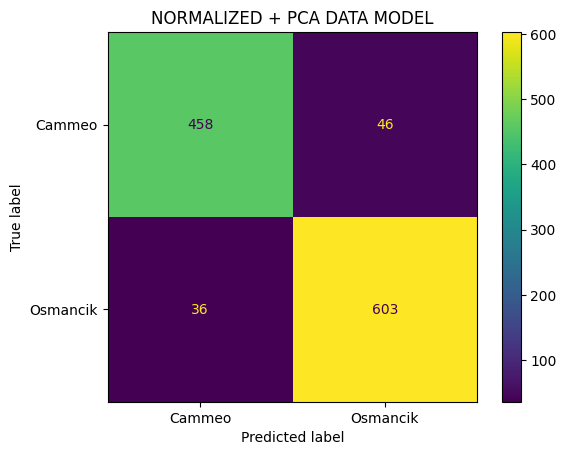

In [53]:
ConfusionMatrixDisplay(confusion_matrix(Y_test_NORM_PCA,normalized_PCA_model.predict(X_test_NORM_PCA)), display_labels = le.classes_).plot()
plt.title('NORMALIZED + PCA DATA MODEL')
plt.show()

pickle the model - export the model

In [35]:
import pickle

pickle.dump(pca_model, open('models/rice-pca.pkl', 'wb'))